In [96]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

Z Transform

In [140]:
#Basic Signal
def delta(n):
    x=[]
    for i in range(len(n)):
        if(n[i]==0):
            x.append(1)
        else:
            x.append(0)     
    return x

def u(n):
    x = []
    for i in range(len(n)):
        if n[i] < 0:
            x.append(0)
        else:
            x.append(1)
    return x

def r(n):
    x = []
    for i in range(len(n)):
        if n[i] < 0:
            x.append(0)
        else:
            x.append(n[i])
    return x

def alpha_n(n):
    alpha = 0.1
    x = []
    for i in range(len(n)):
        if n[i]<0:
            x.append(0)
        else:
            x.append(np.power(alpha,n[i]))
    return x

def n_alpha(n):
    alpha = 0.2
    x =[]
    for i in range(len(n)):
        if n[i]<0:
            x.append(0)
        else:
            x.append(n[i] * np.power(alpha,n[i]))
    return x

def r_cos(n):
    r = 5
    wo = 2
    x = []
    for i in range(len(n)):
        if n[i]<0:
            x.append(0)
        else:
            x.append(np.power(r,n[i])*np.cos(wo*n[i]))
    return x

In [154]:
def x_n_real(z,n):
    y = []
    for i in range(len(n)):
        y.append(np.power(z,n[i]))
        
    return y

def x_n_com(z,n):
    y = []
    for i in range(len(n)):
        y.append(((np.power(z[0],n[i]) * np.cos(z[1]*n[i])),(np.power(z[0],n[i]) * np.sin(z[1]*n[i]))))
    return y

def delay(x,k):
    y = []
    for i in range(k):
        y.append((0,0))
    for i in range(k,len(x)):
        y.append(x[i-k])
    return y

def h_z(z):
    return ((2/np.power(z[0],3))*np.cos(z[1]*3)),(-1*(2/np.power(z[0],3))*np.sin(z[1]*3))

def H_z(x,n,z):
    y = []
    for i in range(len(n)):
        y.append((((x[i]/np.power(z[0],n[i])) * np.cos(n[i]*z[1])),(-1 * x[i]/np.power(z[0],n[i])) * np.sin(n[i]*z[1])))
    return y

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remov

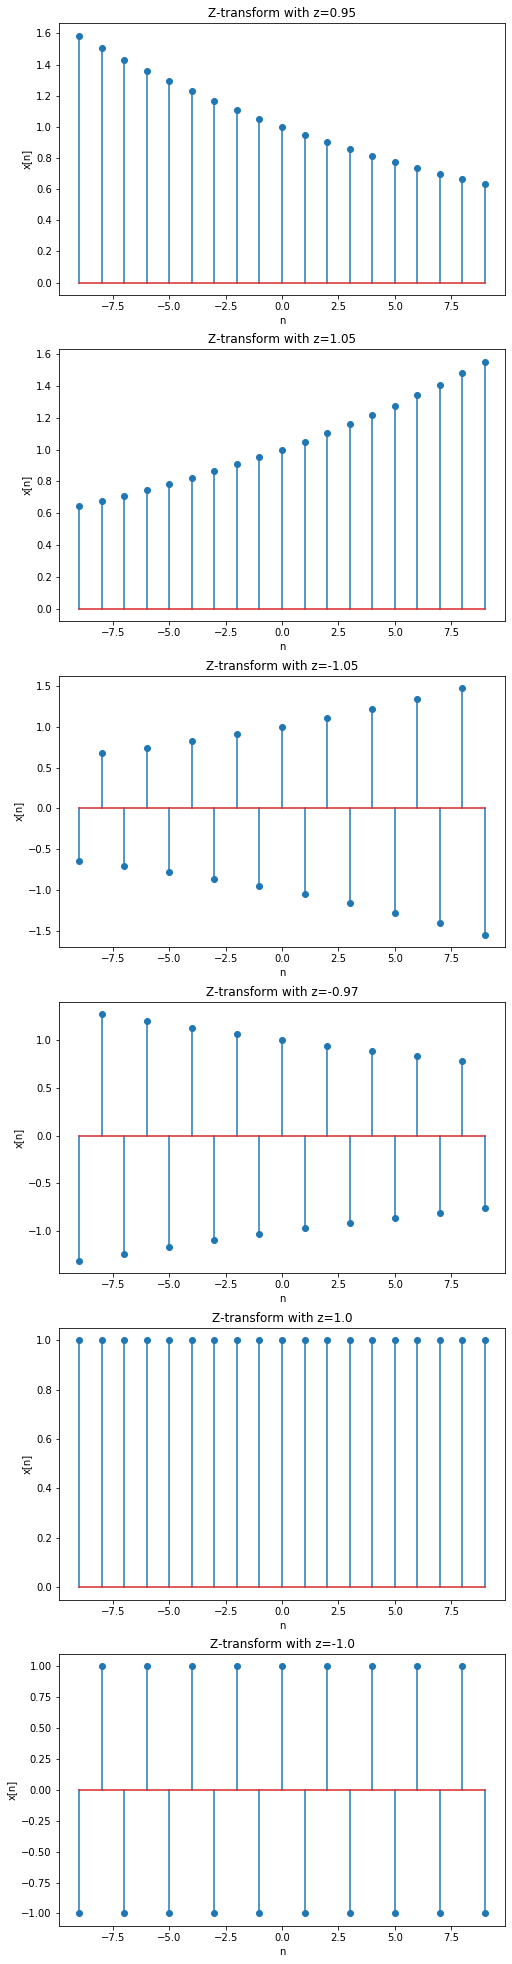

In [18]:
n = np.arange(-9,10)
z_val = np.array([0.95,1.05,-1.05,-0.97,1,-1])

fig = plt.figure(figsize=(8,35))

for i in range(len(z_val)):
    y = x_n_real(z_val[i],n)
    fig.add_subplot(len(z_val),1,i+1, projection='3d')
    Axes3D.scatter(n,y[])
    plt.xlabel('n')
    plt.ylabel('x[n]')
    plt.title("Z-transform with z="+str(z_val[i]))
    
plt.show()

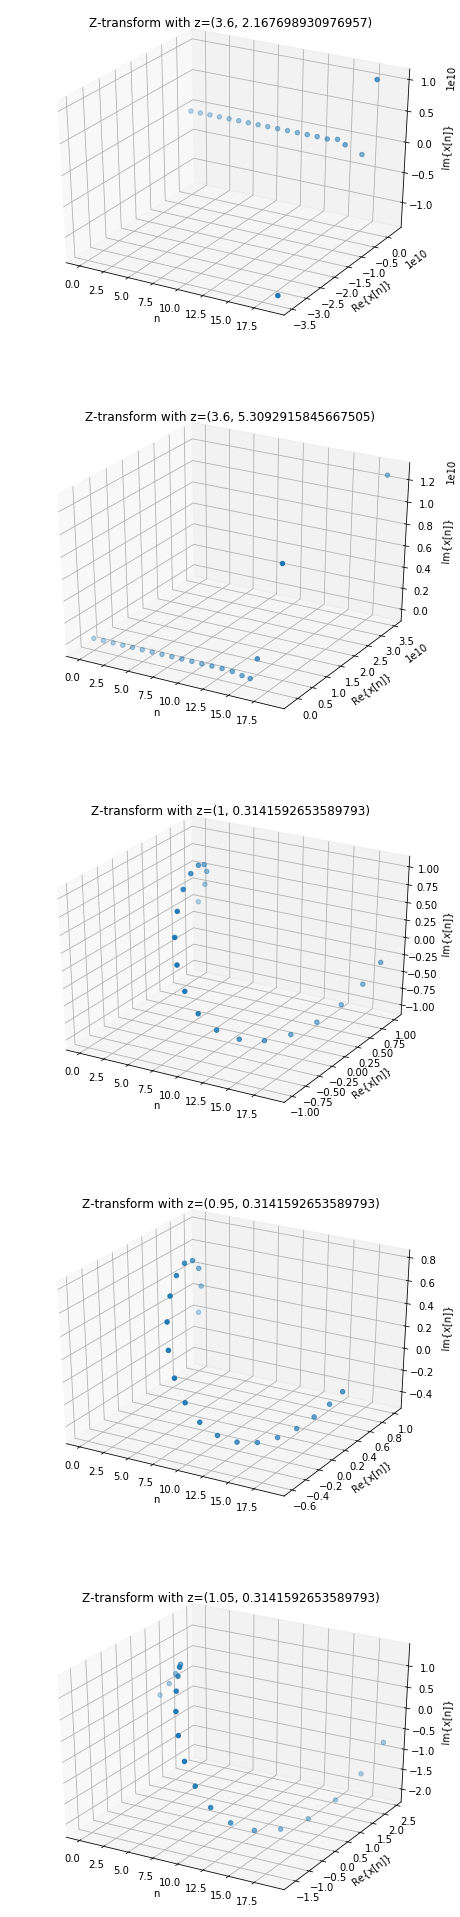

In [178]:
n = np.arange(0,20)
z_com = [(3.6,0.69*np.pi),(3.6,1.69*np.pi),(1,0.1*np.pi),(0.95,0.1*np.pi),(1.05,0.1*np.pi)]

fig = plt.figure(figsize=(8,35))

for i in range(len(z_com)):
    y = np.array(x_n_com(z_com[i],n))
    ax = fig.add_subplot(len(z_com),1,i+1, projection='3d')
    ax.scatter(n,y[:,0],y[:,1])
    ax.set_xlabel('n')
    ax.set_ylabel('Re{x[n]}')
    ax.set_zlabel('Im{x[n]}')
    plt.title("Z-transform with z="+str(z_com[i]))
    
plt.show()

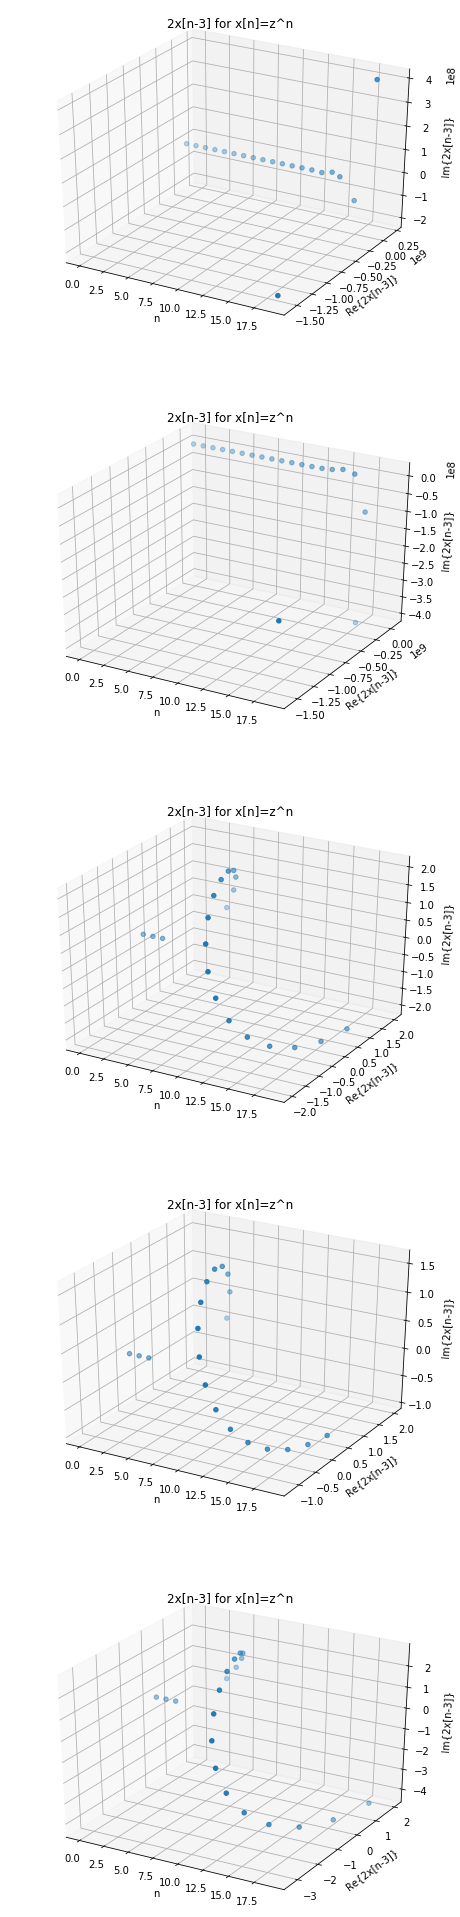

In [139]:
n = np.arange(0,20)
z_com = [(3.6,0.69*np.pi),(3.6,1.69*np.pi),(1,0.1*np.pi),(0.95,0.1*np.pi),(1.05,0.1*np.pi)]

y = []
for i in range(len(z_com)):
    x_n = np.array(x_n_com(z_com[i],n))
    y.append(2*np.array(delay(x_n,3)))

y = np.array(y)

fig = plt.figure(figsize=(8,35))
for i in range(len(y)):
    ax = fig.add_subplot(len(y),1,i+1, projection='3d')
    ax.scatter(n,y[i,:,0],y[i,:,1])
    ax.set_xlabel('n')
    ax.set_ylabel('Re{2x[n-3]}')
    ax.set_zlabel('Im{2x[n-3]}')
    plt.title("2x[n-3] for x[n]=z^n")
    
plt.show()

Text(0.5, 0.92, 'Phase Spectrum')

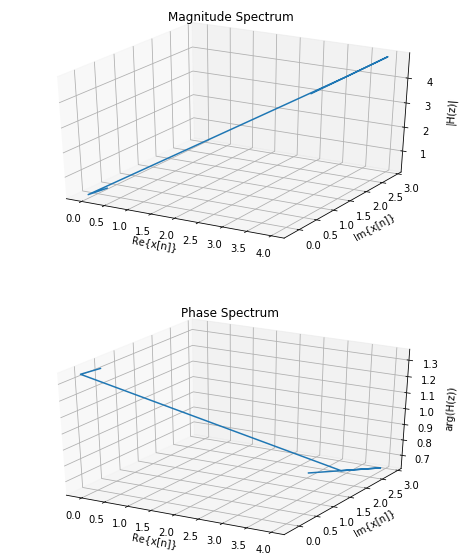

In [141]:
z_com = [(3.6,0.69*np.pi),(3.6,1.69*np.pi),(1,0.1*np.pi),(0.95,0.1*np.pi),(1.05,0.1*np.pi)]

x_n = []
mag_hz = []
arg_hz = []
for i in range(len(z_com)):
    re, im = h_z(z_com[i])
    x_n.append((re,im))
    mag_hz.append(math.sqrt(re**2 + im**2))
    arg_hz.append(np.arctan(im/re))
    
mag_hz = np.array(mag_hz)
arg_hz = np.array(arg_hz)
x_n = np.array(x_n)

fig = plt.figure(figsize=(8,10))

ax = fig.add_subplot(2,1,1, projection='3d')
ax.plot(x_n[:,0],x_n[:,1],mag_hz)
ax.set_zlabel('|H(z)|')
ax.set_xlabel('Re{x[n]}')
ax.set_ylabel('Im{x[n]}')
plt.title("Magnitude Spectrum")

ax = fig.add_subplot(2,1,2, projection='3d')
ax.plot(x_n[:,0],x_n[:,1],arg_hz)
ax.set_zlabel('arg(H(z))')
ax.set_xlabel('Re{x[n]}')
ax.set_ylabel('Im{x[n]}')
plt.title("Phase Spectrum")

In [142]:
n = np.arange(0,20)

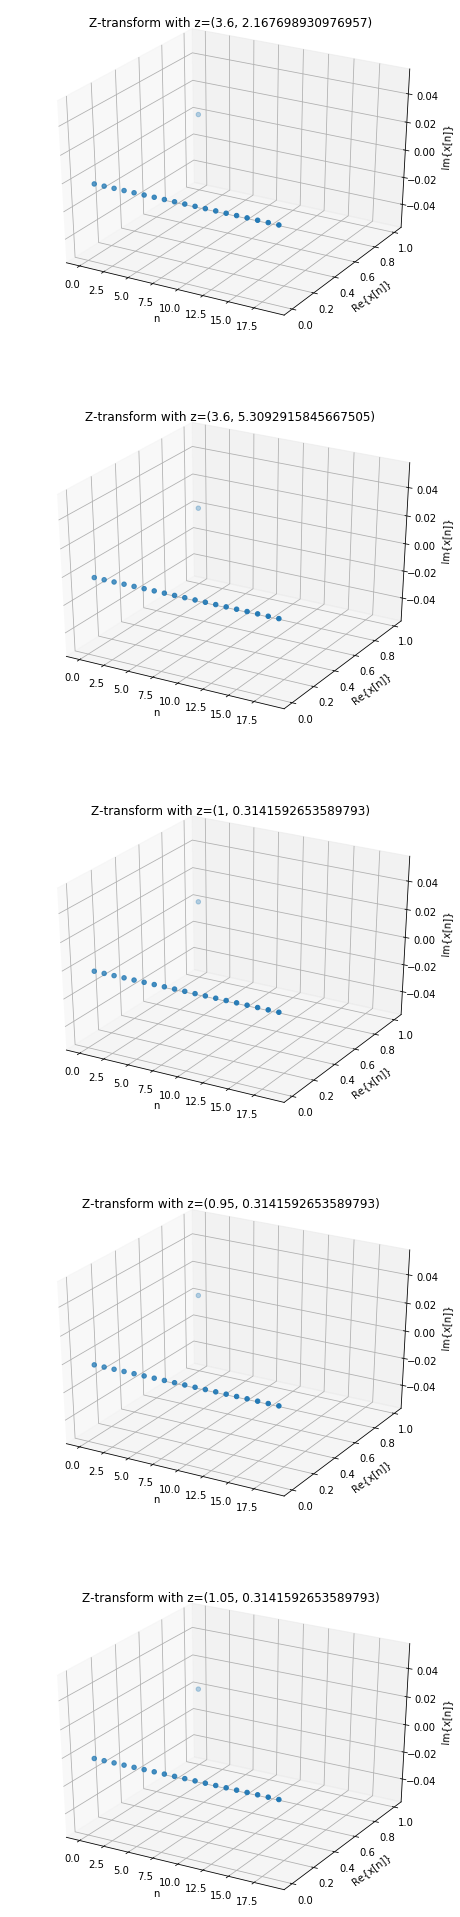

In [172]:
#Delta function
x_n = delta(n)

x_z = H_z(x_n,n,z)

z_com = [(3.6,0.69*np.pi),(3.6,1.69*np.pi),(1,0.1*np.pi),(0.95,0.1*np.pi),(1.05,0.1*np.pi)]

fig = plt.figure(figsize=(8,35))

for i in range(len(z_com)):
    x_z = np.array(H_z(x_n,n,z_com[i]))
    ax = fig.add_subplot(len(z_com),1,i+1, projection='3d')
    ax.scatter(n,x_z[:,0],x_z[:,1])
    ax.set_xlabel('n')
    ax.set_ylabel('Re{x[n]}')
    ax.set_zlabel('Im{x[n]}')
    plt.title("Z-transform with z="+str(z_com[i]))
    
plt.show()

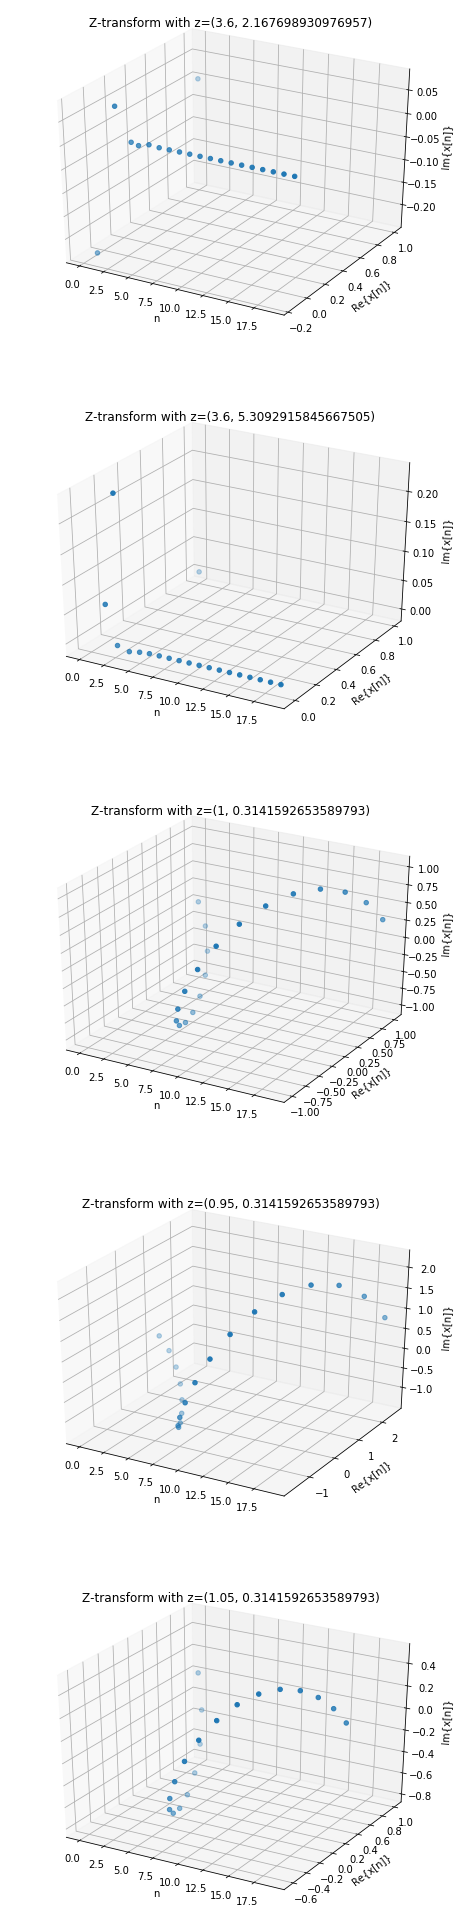

In [173]:
#Unit step function
x_n = u(n)

x_z = H_z(x_n,n,z)

z_com = [(3.6,0.69*np.pi),(3.6,1.69*np.pi),(1,0.1*np.pi),(0.95,0.1*np.pi),(1.05,0.1*np.pi)]

fig = plt.figure(figsize=(8,35))

for i in range(len(z_com)):
    x_z = np.array(H_z(x_n,n,z_com[i]))
    ax = fig.add_subplot(len(z_com),1,i+1, projection='3d')
    ax.scatter(n,x_z[:,0],x_z[:,1])
    ax.set_xlabel('n')
    ax.set_ylabel('Re{x[n]}')
    ax.set_zlabel('Im{x[n]}')
    plt.title("Z-transform with z="+str(z_com[i]))
    
plt.show()

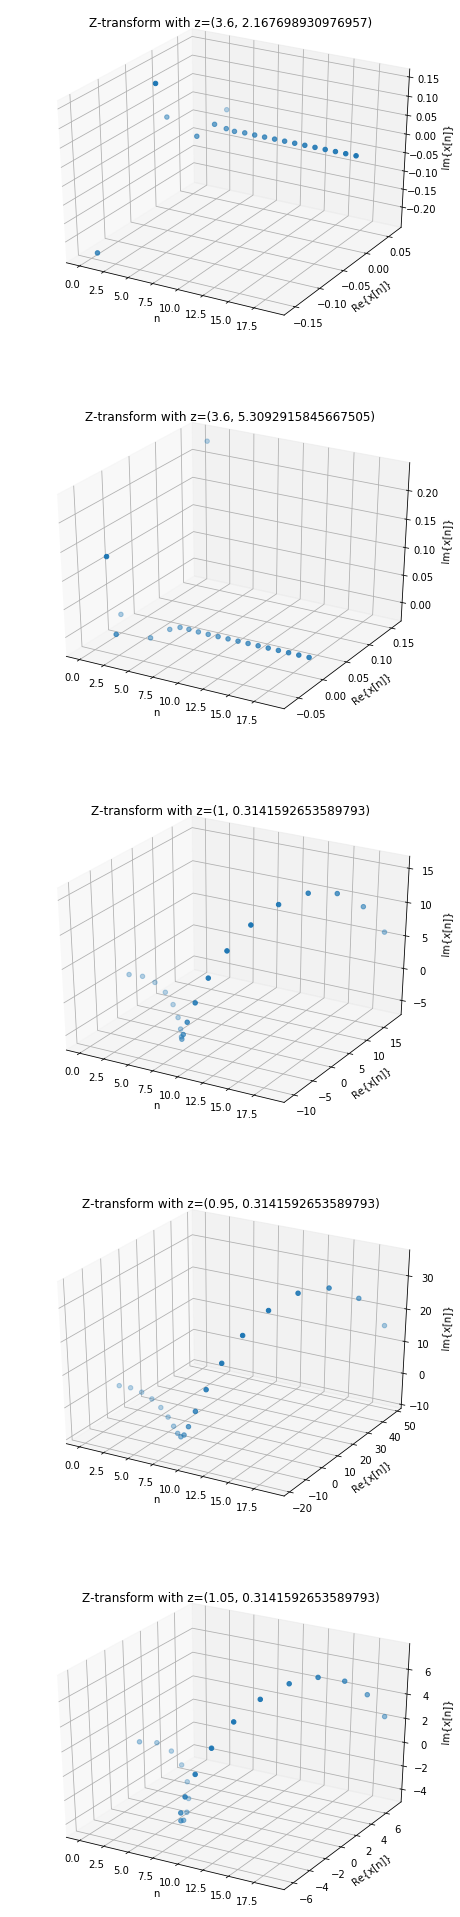

In [174]:
#Ramp function
x_n = r(n)

x_z = H_z(x_n,n,z)

z_com = [(3.6,0.69*np.pi),(3.6,1.69*np.pi),(1,0.1*np.pi),(0.95,0.1*np.pi),(1.05,0.1*np.pi)]

fig = plt.figure(figsize=(8,35))

for i in range(len(z_com)):
    x_z = np.array(H_z(x_n,n,z_com[i]))
    ax = fig.add_subplot(len(z_com),1,i+1, projection='3d')
    ax.scatter(n,x_z[:,0],x_z[:,1])
    ax.set_xlabel('n')
    ax.set_ylabel('Re{x[n]}')
    ax.set_zlabel('Im{x[n]}')
    plt.title("Z-transform with z="+str(z_com[i]))
    
plt.show()

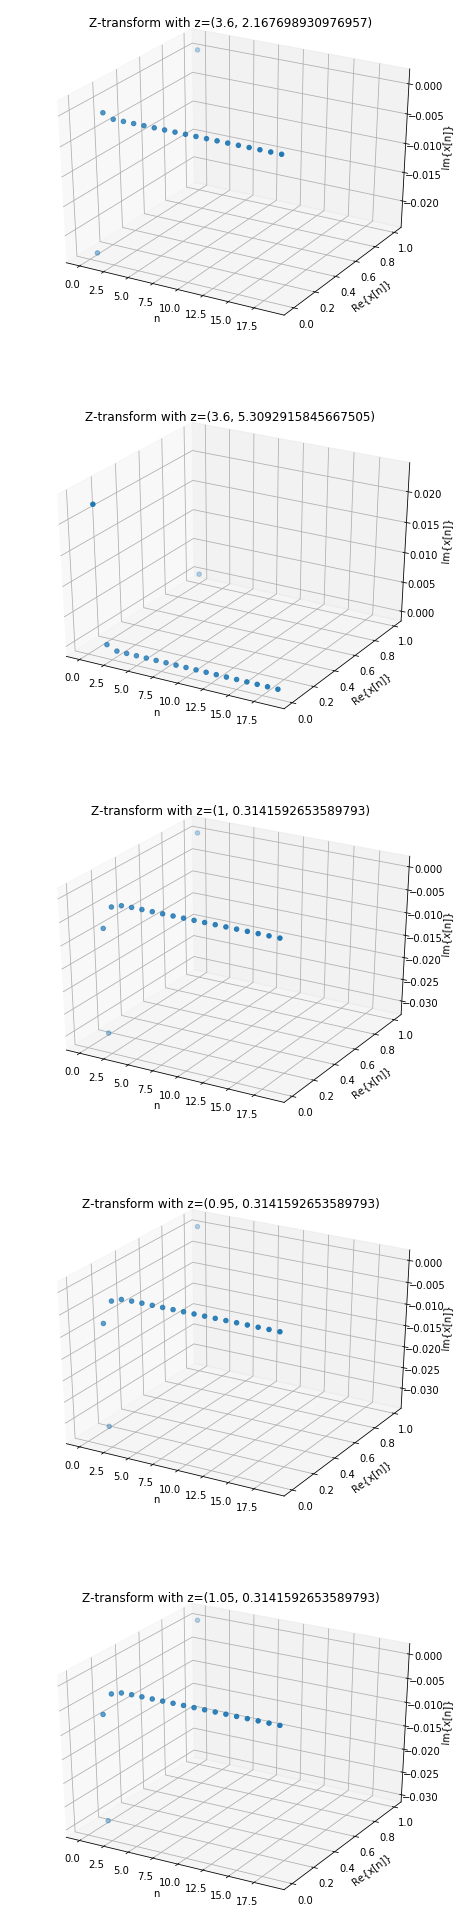

In [175]:
# alpha^nu[n]
x_n = alpha_n(n)

x_z = H_z(x_n,n,z)

z_com = [(3.6,0.69*np.pi),(3.6,1.69*np.pi),(1,0.1*np.pi),(0.95,0.1*np.pi),(1.05,0.1*np.pi)]

fig = plt.figure(figsize=(8,35))

for i in range(len(z_com)):
    x_z = np.array(H_z(x_n,n,z_com[i]))
    ax = fig.add_subplot(len(z_com),1,i+1, projection='3d')
    ax.scatter(n,x_z[:,0],x_z[:,1])
    ax.set_xlabel('n')
    ax.set_ylabel('Re{x[n]}')
    ax.set_zlabel('Im{x[n]}')
    plt.title("Z-transform with z="+str(z_com[i]))
    
plt.show()

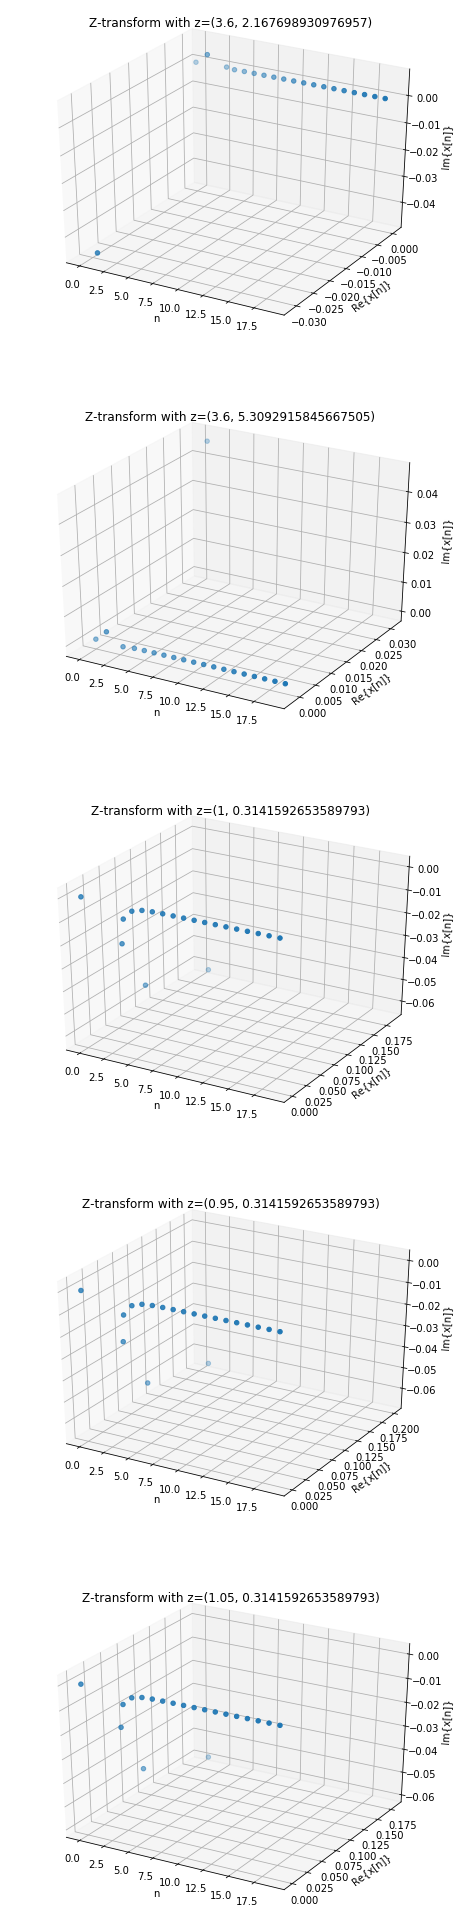

In [176]:
#n(alpha^n)u[n]
x_n = n_alpha(n)

x_z = H_z(x_n,n,z)

z_com = [(3.6,0.69*np.pi),(3.6,1.69*np.pi),(1,0.1*np.pi),(0.95,0.1*np.pi),(1.05,0.1*np.pi)]

fig = plt.figure(figsize=(8,35))

for i in range(len(z_com)):
    x_z = np.array(H_z(x_n,n,z_com[i]))
    ax = fig.add_subplot(len(z_com),1,i+1, projection='3d')
    ax.scatter(n,x_z[:,0],x_z[:,1])
    ax.set_xlabel('n')
    ax.set_ylabel('Re{x[n]}')
    ax.set_zlabel('Im{x[n]}')
    plt.title("Z-transform with z="+str(z_com[i]))
    
plt.show()

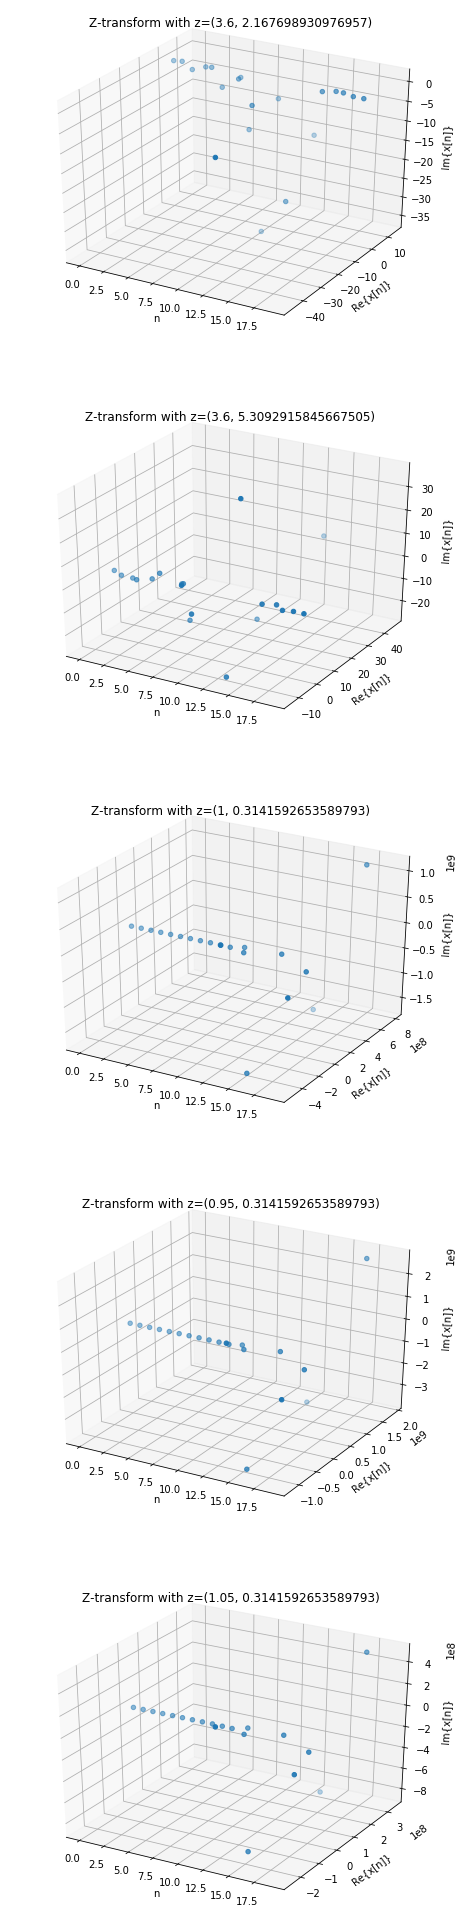

In [177]:
#(r^n)cos(won)u[n]
x_n = r_cos(n)

x_z = H_z(x_n,n,z)

z_com = [(3.6,0.69*np.pi),(3.6,1.69*np.pi),(1,0.1*np.pi),(0.95,0.1*np.pi),(1.05,0.1*np.pi)]

fig = plt.figure(figsize=(8,35))

for i in range(len(z_com)):
    x_z = np.array(H_z(x_n,n,z_com[i]))
    ax = fig.add_subplot(len(z_com),1,i+1, projection='3d')
    ax.scatter(n,x_z[:,0],x_z[:,1])
    ax.set_xlabel('n')
    ax.set_ylabel('Re{x[n]}')
    ax.set_zlabel('Im{x[n]}')
    plt.title("Z-transform with z="+str(z_com[i]))
    
plt.show()

Discrete Time Fourier Series

In [35]:
def sq_x_n(n):
    y = []
    for i in range(len(n)):
        if (n[i]<=7 and n[i]>=0) or (n[i]>=16 and n[i]<=23):
            y.append(1)
        else:
            y.append(0)
    return y

def complex_exp(x):
    return np.cos(x),np.sin(x)

def complex_mul(a,b,x,y):
    return (a*x - b*y),(b*x + a*y)

Text(0.5, 0.92, 'Signal from the given coefficients')

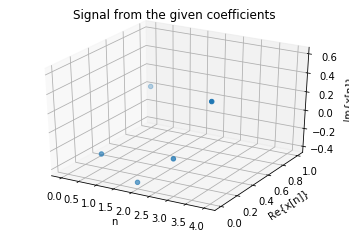

In [188]:
a = [(1,0),(1,1.732),(0.707,0.707),(0.707,0.707),(1,1.732)]
n = np.arange(0,5)

x_k = []
for i in range(5):
    t_x = 0
    for k in range(5):
        re, im = complex_exp((np.pi*2*k*i)/5)
        t_x_re,t_x_im = complex_mul(a[i][0],a[i][1],re,im)
        t_x += t_x_re
        t_x_im += t_x_im
    x_k.append((t_x/5,t_x_im/5))

x_k = np.array(x_k)
fig = plt.figure()
    
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(n,x_k[:,0],x_k[:,1])
ax.set_xlabel('n')
ax.set_ylabel('Re{x[n]}')
ax.set_zlabel('Im{x[n]}')
plt.title("Signal from the given coefficients")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


<StemContainer object of 3 artists>

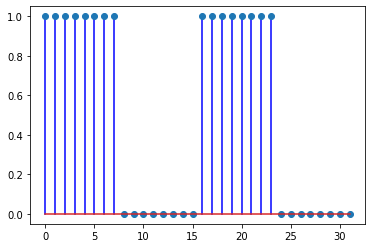

In [27]:
n = np.arange(0,32)

x_n = sq_x_n(n)

plt.stem(n,x_n,'b')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


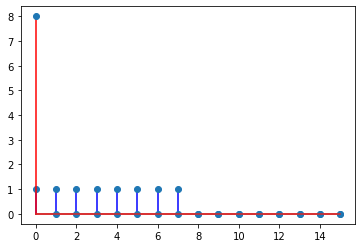

In [189]:
n = np.arange(0,16)

x_n = sq_x_n(n)

c = []
for i in range(16):
    re = im = 0
    for k in range(16):
        t_re,t_im = complex_exp((-1*np.pi*2*k*i)/16)
        re += t_re * x_n[k]
        im += t_im * x_n[k]
    c.append((re/16,im/16))
    
x_k = []
for i in range(16):
    t_x = 0
    for k in range(16):
        re, im = complex_exp((np.pi*2*k*i)/16)
        t_x_re,t_x_im = complex_mul(c[i][0],c[i][1],re,im)
        t_x += t_x_re
    x_k.append(t_x)

plt.stem(n,x_n,'b')
plt.stem(n,x_k,'r')

plt.show()

Continuous Time Fourier Transform

In [101]:
def tri(t,tou):
    x = []
    for i in range(len(t)):
        if t[i] < (-tou/2) or t[i] > (tou/2):
            x.append(0)
        elif t[i] > (-tou/2) and t[i] < 0:
            x.append(1+((2/tou)*t[i]))
        elif t[i] > 0 and t[i] < (tou/2):
            x.append(1-(2*t[i]/tou))
    return x

def FT_cont(x,t,tou):
    y = []
    for i in range(len(x)):
        re, im = complex_exp(-1*(1/tou)*t[i])
        y.append((re*x[i],im*x[i]))
    return y

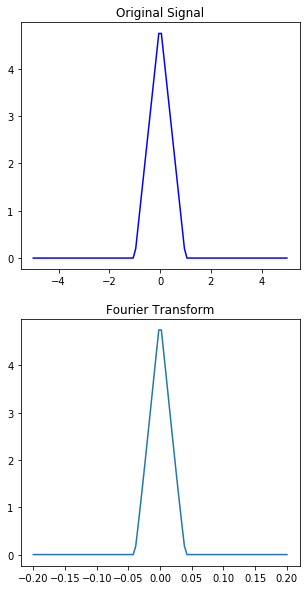

In [203]:
t = np.linspace(-5,5,100)
w = np.linspace(-1/5,1/5,100)

x_t = 5*np.array(tri(t,2))
x_s = np.array(FT_cont(x_t,t,2))

fig = plt.figure(figsize=(5,10))

plt.subplot(2,1,1)
plt.plot(t,x_t,'b')
plt.title("Original Signal")

plt.subplot(2,1,2)
plt.plot(w,x_s[:,0])
plt.title("Fourier Transform")

plt.show()

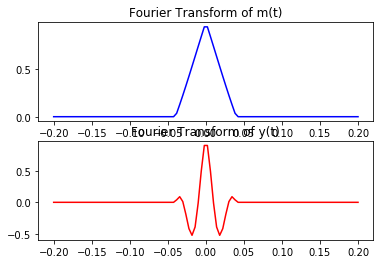

In [204]:
t = np.linspace(-5,5,100)
w = np.linspace(-1/5,1/5,100)

m_t = np.array(tri(t,2))
m_s = np.array(FT_cont(m_t,t,2))

c_t = np.cos(2*np.pi*10000*t)

y_t = np.multiply(m_t,c_t)
y_s = np.array(FT_cont(y_t,t,1/2+(2*np.pi*10000)))

plt.subplot(2,1,1)
plt.plot(w,m_s[:,0],'b')
plt.title("Fourier Transform of m(t)")

plt.subplot(2,1,2)
plt.plot(w,y_s[:,0],'r')
plt.title("Fourier Transform of y(t)")

plt.show()